<a href="https://colab.research.google.com/github/Programming-Communities/Assignment-Q2/blob/main/LangChain_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import userdata
gemini_api_key= userdata.get('GOOGLE_API_KEY')

In [2]:

!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00


In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

In [4]:

initial_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change the {question} to a image generation prompt"
)
second_promt = PromptTemplate(
    input_variables = ["initial_response"],
    template = "read this {first_response} and summarize this into 2 lines for best image genaration!"
)


In [5]:

llm = ChatGoogleGenerativeAI(
    api_key = gemini_api_key,
    model = "gemini-2.0-flash-exp",
    temperature = 0.5
)

In [6]:
first_chain = initial_prompt | llm
second_chain = second_promt | llm

In [7]:

from diffusers import StableDiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [8]:

first_response = first_chain.invoke({"question" : input("type anything : ")})
print("first_chain " , first_response)

second_response = second_chain.invoke({"first_response" : first_response})
print("second_chain " , second_response)

# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image ...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response.content).images[0]


# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

type anything : Web Designing Programming Communities
first_chain  content='Okay, here are a few image generation prompts based on the concept of "Web Designing Programming Communities," playing with different styles and interpretations:\n\n**Option 1: Abstract and Conceptual**\n\n> **Prompt:**  Abstract digital art. Interconnected nodes of light, representing web developers and designers, forming a vibrant network. Glowing lines of code flow between them, suggesting communication and collaboration. Use a color palette of deep blues, purples, and electric greens.\n\n**Option 2:  Modern and Tech-Focused**\n\n> **Prompt:**  A futuristic, minimalist scene. A large, transparent holographic screen displays lines of code and wireframes. Around the screen, diverse avatars of stylized characters (representing developers and designers) are engaged in conversation and interaction. The overall tone should be clean, bright, and high-tech.\n\n**Option 3:  Creative and Collaborative**\n\n> **Prompt:

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['use a color palette of deep blues , purples , and electric greens . ** option 2 : modern and tech - focused ** > ** prompt :** a futuristic , minimalist scene . a large , transparent holographic screen displays lines of code and wireframes . around the screen , diverse avatars of stylized characters ( representing developers and designers ) are engaged in conversation and interaction . the overall tone should be clean , bright , and high - tech . ** option 3 : creative and collaborative ** > ** prompt :** a vibrant , graffiti - style mural depicting a diverse group of people working together on a large digital canvas . the canvas shows elements of web design , code snippets , and ui mockups . use bright ,

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


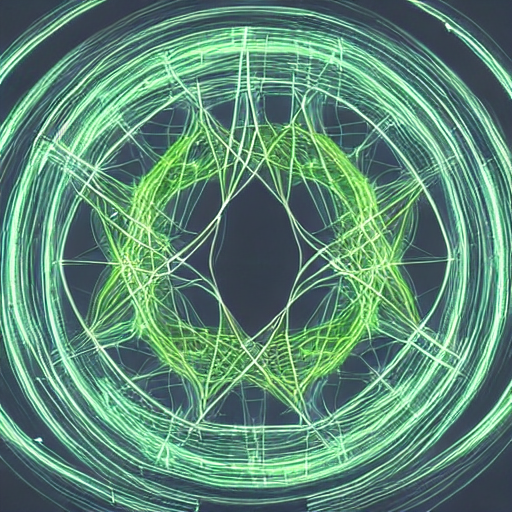

In [9]:
image